In [0]:
import pandas as pd
import numpy as np
import math
import random
import scipy.stats
import matplotlib.pyplot as plt
import itertools

In [0]:
#import zipfile
#with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#    zip_ref.extractall(directory_to_extract_to)

url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/SchoolID_186.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,tDept,tSid,institution_name,tFname,tMiddlename,tLname,tid,tNumRatings,rating_class,contentType,categoryType,overall_rating
0,Medicine,186,Case Western Reserve University,Derek,NaN,Abbott,1626633,1,good,TEACHER,PROFESSOR,5.0
1,Biology,186,Case Western Reserve University,Karen,NaN,Abbott,2192396,3,good,TEACHER,PROFESSOR,4.7
2,Mechanical Engineering,186,Case Western Reserve University,Alexis,NaN,Abramson,813093,14,good,TEACHER,PROFESSOR,4.3
3,History,186,Case Western Reserve University,Amy,NaN,Absher,1550728,18,good,TEACHER,PROFESSOR,4.8
4,Chemistry,186,Case Western Reserve University,Kenneth,NaN,Adair,2038178,10,good,TEACHER,PROFESSOR,3.8


In [4]:
data.columns

Index(['tDept', 'tSid', 'institution_name', 'tFname', 'tMiddlename', 'tLname',
       'tid', 'tNumRatings', 'rating_class', 'contentType', 'categoryType',
       'overall_rating'],
      dtype='object')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import glob

path = r'/content/drive/My Drive/Colab Notebooks/SchoolID_186'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
  df = pd.read_csv(filename, index_col=None, header=0)
  li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [7]:
frame.head()

,attendance,clarityColor,easyColor,helpColor,helpCount,id,notHelpCount,onlineClass,quality,rClarity,rClass,rComments,rDate,rEasy,rEasyString,rErrorMsg,rHelpful,rInterest,rOverall,rOverallString,rStatus,rTextBookUse,rTimestamp,rWouldTakeAgain,sId,takenForCredit,teacher,teacherGrade,teacherRatingTags,unUsefulGrouping,usefulGrouping
0,NaN,good,good,good,0,16909458,0,NaN,awesome,5,ECON343,Have my masters degree because of his help. I...,03/25/2010,4.0,4.0,NaN,5,Sorta interested,5.0,5.0,1,Yes,1269514423000,NaN,186,NaN,NaN,NaN,[],people,people
1,NaN,good,good,good,0,13453146,0,NaN,good,4,ECON326,pretty good professor,09/02/2007,4.0,4.0,NaN,4,Really into it,4.0,4.0,1,No,1188744380000,NaN,186,NaN,NaN,NaN,[],people,people
2,NaN,good,average,good,0,13146507,0,NaN,awesome,4,ECON343,Fun teacher,05/10/2007,2.0,2.0,NaN,5,It's my life,4.5,4.5,1,No,1178832622000,NaN,186,NaN,NaN,NaN,[],people,people
3,NaN,good,poor,good,0,3963117,0,NaN,awesome,5,ECON343,Great prof! Very interesting material and he ...,06/04/2005,1.0,1.0,NaN,5,Really into it,5.0,5.0,1,NaN,1117927869000,NaN,186,NaN,NaN,NaN,[],people,people
4,NaN,good,average,good,0,3261852,0,NaN,awesome,5,ECON343326,great teacher and a real sweetheart. the work ...,01/22/2005,2.0,2.0,NaN,5,Sorta interested,5.0,5.0,1,NaN,1106381397000,NaN,186,NaN,NaN,NaN,[],people,people


In [8]:
reviews = frame[['rComments']]
reviews

,rComments
0,Have my masters degree because of his help. I...
1,pretty good professor
2,Fun teacher
3,Great prof! Very interesting material and he ...
4,great teacher and a real sweetheart. the work ...
...,...
10362,HORRIBLE TEACHER. NO COMMAND ON MATERIAL BUT C...
10363,"worst lecturer EVER - save yourself, DO NOT TA..."
10364,Awesome professor! Class is super easy cause t...
10365,NaN


In [9]:
len(reviews)

10367

In [0]:
from textblob import TextBlob

blob = TextBlob("Analytics Vidhya is a great platform to learn data science. \n It helps community through blogs, hackathons, discussions,etc.")
test = blob.sentiment

In [11]:
test[0]

0.8

In [0]:
sentiments = []

for review in frame.rComments:
  blob = TextBlob(str(review))
  sentiment = blob.sentiment[0]
  sentiments.append(sentiment)

In [13]:
sentiments

[0.9,
 0.475,
 0.3,
 0.5874999999999999,
 0.44166666666666665,
 0.4222222222222222,
 0.0,
 0.21250000000000002,
 0.0,
 0.4,
 0.67625,
 0.2222222222222222,
 0.2847222222222222,
 0.26944444444444443,
 -0.22886904761904767,
 -0.009285714285714262,
 -0.29583333333333334,
 0.16488095238095238,
 0.4783333333333333,
 -0.1796296296296296,
 0.3583333333333332,
 0.25166666666666665,
 0.21071428571428572,
 0.19833333333333333,
 0.3297619047619048,
 0.35,
 0.25416666666666665,
 0.36666666666666664,
 0.5499999999999999,
 0.1475,
 0.09305555555555556,
 0.39464285714285713,
 0.2791666666666667,
 -0.09999999999999999,
 0.40499999999999997,
 0.7166666666666667,
 -0.6666666666666666,
 0.08833333333333333,
 -0.6875,
 -0.17083333333333334,
 0.17380952380952383,
 0.4135,
 0.2966666666666667,
 -0.17222222222222225,
 0.2784615384615384,
 0.15416666666666665,
 0.1203472222222222,
 0.4651190476190476,
 0.6875,
 0.4777777777777778,
 0.13333333333333333,
 0.18333333333333335,
 0.0,
 0.0,
 -0.2333333333333333,
 0

In [14]:
len(sentiments)

10367

In [0]:
positive1 = 0
neutral1 = 0
negative1 = 0

# options:
# split in 5 with focus on extremes: 0.6
#choice = 0.6
# split in 5: 0.2
#choice = 0.2
# split in 3: 0.33
choice = 0.33
for num in sentiments:
  if num < -choice:
    negative1 += 1
  elif num > choice:
    positive1 += 1
  else:
    neutral1 += 1


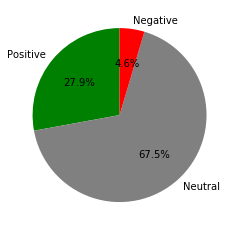

In [16]:
import matplotlib.pyplot as plt

review_sentiments = [positive1, neutral1, negative1]
labels = ['Positive', 'Neutral', 'Negative']
colors = ['g', 'gray', 'r']
plt.pie(review_sentiments, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [17]:
frame.quality.unique()

array(['awesome', 'good', 'awful', 'average', 'poor'], dtype=object)

In [0]:
good = 0
ok = 0
bad = 0

for quality in frame.quality:
  if quality == 'awesome' or quality == 'good':
    good += 1
  if quality == 'average':
    ok += 1
  if quality == 'poor' or quality == 'awful':
    bad += 1

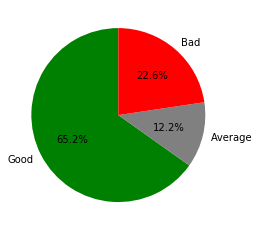

In [19]:
quality_counts = [good, ok, bad]
labels = ['Good', 'Average', 'Bad']
colors = ['g', 'gray', 'r']
plt.pie(quality_counts, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [0]:
good = 0
ok = 0
bad = 0

for quality in frame.quality:
  if quality == 'awesome':
    good += 1
  if quality == 'average' or quality == 'good' or quality == 'poor':
    ok += 1
  if quality == 'awful':
    bad += 1

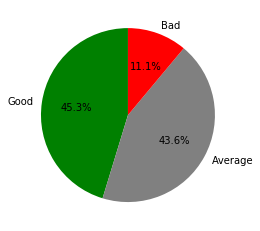

In [21]:
quality_counts = [good, ok, bad]
labels = ['Good', 'Average', 'Bad']
colors = ['g', 'gray', 'r']
plt.pie(quality_counts, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [22]:
frame.columns

Index(['attendance', 'clarityColor', 'easyColor', 'helpColor', 'helpCount',
       'id', 'notHelpCount', 'onlineClass', 'quality', 'rClarity', 'rClass',
       'rComments', 'rDate', 'rEasy', 'rEasyString', 'rErrorMsg', 'rHelpful',
       'rInterest', 'rOverall', 'rOverallString', 'rStatus', 'rTextBookUse',
       'rTimestamp', 'rWouldTakeAgain', 'sId', 'takenForCredit', 'teacher',
       'teacherGrade', 'teacherRatingTags', 'unUsefulGrouping',
       'usefulGrouping'],
      dtype='object')

In [23]:
frame.rEasy.unique()

array([4., 2., 1., 3., 5.])

In [24]:
easy = 0
neutral = 0
hard = 0

for quality in frame.rEasy:
  if quality == 1 or quality == 2:
    easy += 1
  if quality == 3:
    neutral += 1
  if quality == 4 or quality == 5:
    hard += 1

print(easy+neutral+hard)

10367


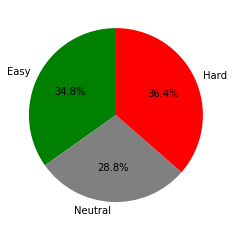

In [25]:
quality_counts = [easy, neutral, hard]
labels = ['Easy', 'Neutral', 'Hard']
colors = ['g', 'gray', 'r']
plt.pie(quality_counts, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [26]:
easy = 0
neutral = 0
hard = 0

for quality in frame.rEasy:
  if quality == 1:
    easy += 1
  if quality == 2 or quality == 3 or quality == 4:
    neutral += 1
  if quality == 5:
    hard += 1

print(easy+neutral+hard)

10367


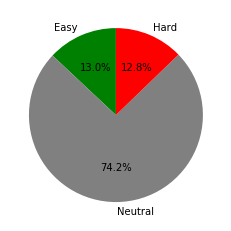

In [27]:
quality_counts = [easy, neutral, hard]
labels = ['Easy', 'Neutral', 'Hard']
colors = ['g', 'gray', 'r']
plt.pie(quality_counts, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [0]:
from pandas import DataFrame

review_list = []
for review in frame.rComments:
  review_list.append(review)

result = pd.DataFrame(
    {'review': review_list,
     'sentiment': sentiments,
    })

In [29]:
len(review_list)

10367

In [30]:
len(sentiments)

10367

In [31]:
result.head()

,review,sentiment
0,Have my masters degree because of his help. I...,0.900000
1,pretty good professor,0.475000
2,Fun teacher,0.300000
3,Great prof! Very interesting material and he ...,0.587500
4,great teacher and a real sweetheart. the work ...,0.441667


In [0]:
export_csv = result.to_csv (r'C:\Users\Sarah\Desktop\export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [33]:
from google.colab import files
result.to_csv('cwru_sentiments.csv')
files.download('cwru_sentiments.csv')

MessageError: ignored

In [0]:
frame['sentiment'] = pd.Series(sentiments, index=frame.index)

In [0]:
frame.head()

In [0]:
frame.to_csv('cwru_sentiments.csv')
files.download('cwru_sentiments.csv')

In [0]:
url = "https://raw.githubusercontent.com/sarahyurick/datasets/master/cwru_sentiments.csv"
cwru = pd.read_csv(url)

In [0]:
cwru.head()

In [0]:
cwru

In [0]:
len(cwru)

In [0]:
cwru.sentiment